
(569, 30) (569,)
(398, 30) (171, 30) (398,) (171,)


Epoch 1/50


13/13 [==============================] - 1s 34ms/step - loss: 0.7050 - accuracy: 0.5251 - val_loss: 0.6322 - val_accuracy: 0.8596
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 0.6332 - accuracy: 0.7613 - val_loss: 0.6827 - val_accuracy: 0.6023
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6684 - accuracy: 0.6382 - val_loss: 0.6784 - val_accuracy: 0.6023
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6412 - accuracy: 0.6382 - val_loss: 0.6221 - val_accuracy: 0.6023
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6218 - accuracy: 0.6382 - val_loss: 0.6211 - val_accuracy: 0.6023
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6052 - accuracy: 0.6382 - val_loss: 0.6701 - val_accuracy: 0.6023
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6245 - accuracy: 0.6382 - val

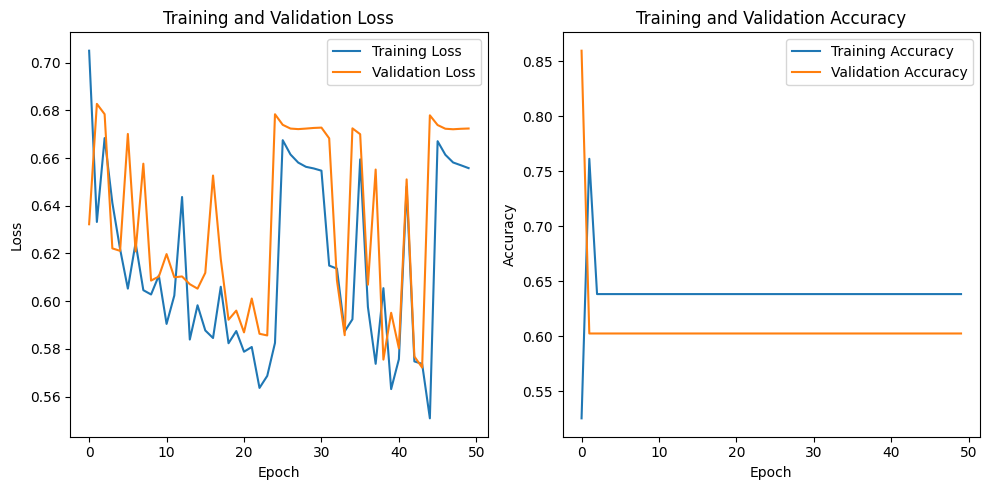

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer

#1. The libraries keras.models and keras.layers are imported to design a
#sequential model having dense layers. We need to import the train_test_
#split from sklearn.model_selection module for splitting the data into train
#and test sets.

data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, y.shape)

#2. The breast cancer dataset is loaded using load_breast_cancer function.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#3. The train_test_split function is used to split the dataset into train
#and test set.

model_2 = Sequential()
model_2.add(Dense(units=16, input_dim= X.shape[1], activation='sigmoid'))
model_2.add(Dense(units=1, activation='sigmoid'))

#4. The model having an input layer and two dense layers of 16(hidden
#layer) and 1 (for output) neuron with sigmoid activation is created. The
#model is compiled with 'sgd' optimizer, binary cross entropy loss (binary
#classification), and accuracy metric. The model is trained over 50 epochs
#with the training set.

model_2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model_2.fit(X_train, y_train, epochs=50, batch_size=32,
                      validation_data=(X_test, y_test))
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

#5. Note that after compiling the model, the output was saved in a variable
#called history. This is a dictionary from which training and validation
#accuracy and loss are plotted.

import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
